## LIME explanations for a regression task

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
import sklearn.ensemble
import lime
import lime.lime_tabular
np.random.seed(1)

In [3]:
data = pd.read_csv("data/insurance.csv")

In [4]:
data.head()

age  sex     bmi  children  smoker      charges
0   19    0  27.900         0       1  16884.92400
1   18    1  33.770         1       0   1725.55230
2   28    1  33.000         3       0   4449.46200
3   33    1  22.705         0       0  21984.47061
4   32    1  28.880         0       0   3866.85520

In [5]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [6]:
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20)

# Handling missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train_imputed = imp_mean.fit_transform(train)

# Standardize the training data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_imputed)
train_scaled


array([[0.76086957, 0.        , 0.28625235, 0.        , 0.        ],
       [0.76086957, 1.        , 0.14635459, 0.2       , 0.        ],
       [0.        , 1.        , 0.57384988, 0.        , 0.        ],
       ...,
       [0.7173913 , 0.        , 0.51116492, 0.4       , 1.        ],
       [0.47826087, 0.        , 0.16841539, 0.4       , 1.        ],
       [0.84782609, 1.        , 0.32230293, 0.2       , 0.        ]])

In [7]:
# Handling missing values
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train_imputed = imp_mean.fit_transform(train)

# Standardize the training data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_imputed)
train_scaled

array([[0.76086957, 0.        , 0.28625235, 0.        , 0.        ],
       [0.76086957, 1.        , 0.14635459, 0.2       , 0.        ],
       [0.        , 1.        , 0.57384988, 0.        , 0.        ],
       ...,
       [0.7173913 , 0.        , 0.51116492, 0.4       , 1.        ],
       [0.47826087, 0.        , 0.16841539, 0.4       , 1.        ],
       [0.84782609, 1.        , 0.32230293, 0.2       , 0.        ]])

In [8]:
# Handling missing values
test_imputed = imp_mean.transform(test)

# Standardize the training data
test_scaled = scaler.transform(test_imputed)


In [9]:
# Train a random forest 
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(train_scaled, labels_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [10]:
r2 = r2_score(labels_test, rf.predict(test_scaled))
print("Model evaluation (R2): ",r2)

Model evaluation (R2):  0.8481471326027317


In [11]:
categorical_features = [1,3,4]

In [12]:
# Generates the explanation
explainer = lime.lime_tabular.LimeTabularExplainer(train_scaled, 
                                                   feature_names=X.columns, 
                                                   class_names=['charges'], 
                                                   categorical_features=categorical_features, 
                                                   verbose=True, 
                                                   mode='regression')

In [13]:
# Handling missing values
test_imputed = imp_mean.transform(test)

# Standardize the training data
test_scaled = scaler.transform(test_imputed)


In [14]:
i = 1
exp1 = explainer.explain_instance(test_scaled[i], rf.predict, num_features=4)

Intercept 31051.570818454697
Prediction_local [14566.62619778]
Right: 12952.622389400056


In [15]:
exp1.show_in_notebook(show_all=True)

In [16]:
# Coefficients of the local model
exp1.as_list()

[('smoker=0', -23955.32602577632),
 ('age > 0.72', 7208.359916145673),
 ('0.39 < bmi <= 0.50', 1515.0460670632594),
 ('children=0', -1253.024578107975)]

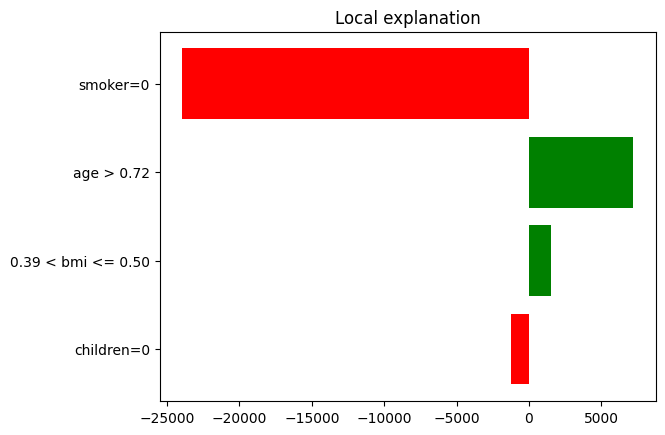

In [17]:
# alternative way to plot
%matplotlib inline
fig = exp1.as_pyplot_figure()

### Explaining another instance

### Explanation using only one factor